# Goal

The goal of this notebook is to see the data, decide how to deal with Nan values and what new features could be useful in later analysis

# Imports, reading and taking a first look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw_game_data.csv")

In [3]:
df.head()

,Unnamed: 0,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,Hockey,Birds,Hobby Sim,Electronic Music,Documentary,Feature Film,Volleyball,Cricket,8-bit Music,Batman
0,0,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,7642084,1173003,0,"100,000,000 .. 200,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1172470,Apex Legends,Respawn,Electronic Arts,NaN,668053,326926,0,"100,000,000 .. 200,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",NaN,1520457,1037487,0,"100,000,000 .. 200,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1623730,Palworld,Pocketpair,Pocketpair,NaN,358266,22443,0,"50,000,000 .. 100,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,440,Team Fortress 2,Valve,Valve,NaN,1044264,117208,0,"50,000,000 .. 100,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Unnamed: 0,appid,score_rank,positive,negative,userscore,average_forever,average_2weeks,median_forever,median_2weeks,...,Hockey,Birds,Hobby Sim,Electronic Music,Documentary,Feature Film,Volleyball,Cricket,8-bit Music,Batman
count,9991.0,9.991000e+03,5.0,9.991000e+03,9.991000e+03,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,...,4.000000,3.000000,2.000000,7.000000,5.000000,2.000000,1.0,2.00000,1.0,1.0
mean,0.0,9.021531e+05,99.0,1.215222e+04,1.950167e+03,0.036032,1028.820138,132.775698,471.427485,139.337704,...,171.500000,76.000000,158.500000,72.000000,105.200000,27.000000,107.0,46.50000,76.0,981.0
std,0.0,7.301218e+05,1.0,9.541162e+04,1.813784e+04,1.672334,3881.052564,892.906198,1716.426421,955.623470,...,264.964778,69.202601,65.760931,81.371576,118.942003,1.414214,NaN,21.92031,NaN,NaN
min,0.0,1.000000e+01,98.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,19.000000,112.000000,6.000000,32.000000,26.000000,107.0,31.00000,76.0,981.0
25%,0.0,3.372100e+05,98.0,4.310000e+02,1.100000e+02,0.000000,141.000000,0.000000,80.000000,0.000000,...,30.000000,37.500000,135.250000,11.000000,42.000000,26.500000,107.0,38.75000,76.0,981.0
50%,0.0,6.555000e+05,99.0,1.517000e+03,2.960000e+02,0.000000,307.000000,0.000000,209.000000,0.000000,...,55.000000,56.000000,158.500000,14.000000,64.000000,27.000000,107.0,46.50000,76.0,981.0
75%,0.0,1.334005e+06,100.0,5.001500e+03,8.735000e+02,0.000000,814.000000,3.000000,411.000000,3.000000,...,196.500000,104.500000,181.750000,128.000000,72.000000,27.500000,107.0,54.25000,76.0,981.0
max,0.0,3.605460e+06,100.0,7.642084e+06,1.173003e+06,95.000000,133736.000000,20111.000000,64554.000000,20149.000000,...,567.000000,153.000000,205.000000,206.000000,316.000000,28.000000,107.0,62.00000,76.0,981.0


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Analysing Nan values


In [6]:
print(df.columns.unique())

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever',
       ...
       'Hockey', 'Birds', 'Hobby Sim', 'Electronic Music', 'Documentary',
       'Feature Film', 'Volleyball', 'Cricket', '8-bit Music', 'Batman'],
      dtype='object', length=466)


### What to do with this amount of columns?
Actually what we need here is the first 18 columns(till the genre). Everything else is just a category where Nan values should be changed to 0, or deleted and changed to single or two columns with values that best describes the game.

In [7]:
game_info = df.iloc[:, :19]
game_tags = df.iloc[:, 19:]

In [8]:
for i in game_info:
    print(f"{i} :  {game_info[i].isna().sum()}")

appid :  0
name :  0
developer :  33
publisher :  53
score_rank :  9986
positive :  0
negative :  0
userscore :  0
owners :  0
average_forever :  0
average_2weeks :  0
median_forever :  0
median_2weeks :  0
price :  0
initialprice :  0
discount :  0
ccu :  0
languages :  2
genre :  38


## score_rank

Score rank is a rank of a game based on comunity reviews. Only 250 games got this rating so its understandable why there is so little values. This column could give a glimpse into understanding how high reviews affect price or, possibly, in game online but only 5 real values is not enough to make any assumptions. Therefore is better we drop this column.

In [9]:
game_info = game_info.drop(columns=['score_rank'])

## languages

In [10]:
game_info.loc[game_info.languages.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre
2565,319150,Hazard Ops,Yingpei Games,Infernum Productions AG,672,272,0,"500,000 .. 1,000,000",203,0,75,0,0,0,0,0,NaN,"Action, Free to Play"
3981,783140,Removed,NaN,NaN,25,15,0,"200,000 .. 500,000",164,0,74,0,0,0,0,0,NaN,"Action, Indie, Simulation"


"Removed" should obviosly be dropped but case with "Hazard Ops" is much more intresting. Steam page of this game has got languages(English, French and German) but the page itself can not be found via steam serch system which could lead to steamspy bug. I am going to change Nan values to the the information from the steam page.

In [11]:
game_info.drop([3981], inplace = True)
game_tags.drop([3981], inplace = True) # also needed for later
game_info.loc[2565, 'languages'] = 'English, French, German'

## developer

In [12]:
game_info.loc[game_info.developer.isna()].head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre
1173,247120,Portal 2 Sixense Perceptual Pack,NaN,Sixense,299,225,0,"1,000,000 .. 2,000,000",464,0,2,0,0,0,0,0,English,NaN
1603,1108320,妄想破绽 Broken Delusion,NaN,bilibili,2443,1589,0,"500,000 .. 1,000,000",7144,0,688,0,699,699,0,0,Simplified Chinese,"Adventure, Indie"
2125,396160,Secret Of Magia,NaN,Senpai Industrial Studios,463,445,0,"500,000 .. 1,000,000",412,25,244,38,199,199,0,1,English,"Action, Adventure, Indie, RPG"
2145,353380,Steam Link,NaN,Anima Locus,5693,1722,0,"500,000 .. 1,000,000",0,0,0,0,0,0,0,1,"English, French, Italian, German, Spanish - Sp...",NaN
2159,214190,Minimum,NaN,"Atari Inc., Cubed Productions LLC",2405,1590,0,"500,000 .. 1,000,000",302,0,186,0,0,0,0,0,English,Action


These games actually do not have developer! which is really weird and don't really make sense. Еhe best option would probably be to replace Nan values with its publisher's name.

In [13]:
game_info.loc[game_info.developer.isna(), "developer"] = game_info.loc[game_info.developer.isna(), "publisher"]

Now we have to see if there are any Nan values laft due to game having no publisher and developer

In [14]:
game_info.loc[game_info.developer.isna()].head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre
4134,355150,gravilon,NaN,NaN,742,506,0,"200,000 .. 500,000",174,0,188,0,299,299,0,1,English,"Adventure, Indie, Strategy"
5323,305840,Shallow Space,NaN,NaN,59,172,0,"200,000 .. 500,000",120,0,120,0,1499,1499,0,0,English,"RPG, Simulation, Strategy, Early Access"
7289,525460,Sullen: Light is Your Friend,NaN,NaN,21,43,0,"100,000 .. 200,000",237,0,279,0,49,499,90,0,"English, Turkish","Adventure, Indie, Early Access"


That's weird and unexpected to say at least, but a this point there no real need to do anything with this. It won't mess with graphs and analysys.

## publisher

In [15]:
game_info.loc[game_info.publisher.isna()].head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre
529,40800,Super Meat Boy,Team Meat,NaN,33571,1923,0,"2,000,000 .. 5,000,000",354,227,130,227,1499,1499,0,72,"English, Russian",Indie
1117,12900,AudioSurf,Dylan Fitterer,NaN,10490,470,0,"1,000,000 .. 2,000,000",424,0,140,0,999,999,0,11,"English, Russian",Indie
1249,2713550,Cursed Dawn,Cursed Studios,NaN,2,7,0,"1,000,000 .. 2,000,000",0,0,0,0,1199,1499,20,0,English,"Action, Indie, Strategy"
1281,1789480,Marauders,Small Impact Games,NaN,14768,5911,0,"1,000,000 .. 2,000,000",2134,0,688,0,2999,2999,0,17,"English, French, Italian, German, Russian, Sim...","Action, Early Access"
1824,385770,Time Clickers,Proton Studio Inc,NaN,4420,628,0,"500,000 .. 1,000,000",2748,2956,187,2956,0,0,0,146,English,"Action, Casual, Free To Play, Indie"


Same case as with developers, these games basically have no publisher. We will fill it with the name of a developer.

In [16]:
game_info.loc[game_info.publisher.isna(), "publisher"] = game_info.loc[game_info.publisher.isna(), "developer"]

## genre

In [17]:
game_info.loc[game_info.genre.isna()].head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre
206,241930,Middle-earth: Shadow of Mordor,Monolith Productions,"Warner Bros. Interactive Entertainment, Warner...",83849,6866,0,"5,000,000 .. 10,000,000",1312,133,726,201,1999,1999,0,441,"English, French, Italian, German, Spanish - Sp...",NaN
605,900883,The Elder Scrolls IV: Oblivion Game of the Yea...,Bethesda Game Studios®,Bethesda Softworks,48307,2354,0,"2,000,000 .. 5,000,000",0,0,0,0,1999,1999,0,0,English,NaN
1158,250820,SteamVR,Valve,Digital Leisure Inc.,61933,8707,0,"1,000,000 .. 2,000,000",0,0,0,0,0,0,0,0,"English, French, Italian, German, Spanish - Sp...",NaN
1173,247120,Portal 2 Sixense Perceptual Pack,Sixense,Sixense,299,225,0,"1,000,000 .. 2,000,000",464,0,2,0,0,0,0,0,English,NaN
1475,955900,Amazing Cultivation Simulator,GSQ Games,GSQ Games,19720,3289,0,"500,000 .. 1,000,000",4191,106,975,185,2499,2499,0,598,"Simplified Chinese, English",NaN


These games probably have no genres due not being actually games(like steamVR or DLC). We should fill Nan values with empty string so it easily can be one hot encoded later. 

In [18]:
game_info.genre = game_info.genre.fillna("")

## Overview 

In [19]:
for i in game_info:
    print(f"{i} :  {game_info[i].isna().sum()}")

appid :  0
name :  0
developer :  3
publisher :  3
positive :  0
negative :  0
userscore :  0
owners :  0
average_forever :  0
average_2weeks :  0
median_forever :  0
median_2weeks :  0
price :  0
initialprice :  0
discount :  0
ccu :  0
languages :  0
genre :  0


Looks good enough. Genres will be encoded for easier analysis and Nan values will be gone but it's a pitty to leave 3 unknown publishers and developers. Thankfully, there no big need to change it.

# Feature engineering

Main goal are:  
* One hot encode 'genre' and 'languages'
* Fetch tags that best describe the game
* make new features through combinations of existing ones
* see what features actually make sense and give any information

## Encoding

In [20]:
genres_encoded = pd.DataFrame()

In [21]:
for i, value in game_info.genre.items():
    genres = value.split(", ")

    for g in genres:
        if g not in genres_encoded:
            genres_encoded[g]=0

    genres_encoded.loc[i, genres] = 1

genres_encoded = genres_encoded.fillna(0)

In [22]:
genres_encoded.head()

,Action,Free To Play,Adventure,Massively Multiplayer,Indie,RPG,Early Access,Casual,Simulation,Animation & Modeling,...,Audio Production,Software Training,Web Publishing,Nudity,Violent,Free to Play,Movie,Gore,Sexual Content,Accounting
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Great! 30 columns is not that much and now it can be easily read, graphed and compared.

In [23]:
languages_encoded = pd.DataFrame()

for i, value in game_info.languages.items():
    for noise in ["\r", "\n", "[b]", "*", "[/b]", ";"]:
        value = value.replace(noise, "") #  there are values that look like "Italian \r\n\r\n[b]*[/b]"
    value = value.strip()
    value = value.replace(" ,", ",")
    languages = list(set(value.split(", ")))
            
    for l in languages:
        if l not in languages_encoded:
            languages_encoded[l]=0

    languages_encoded.loc[i, languages] = 1

languages_encoded = languages_encoded.fillna(0)

In [24]:
languages_encoded.head()

,Traditional Chinese,German,Korean,Thai,Spanish - Spain,English,Portuguese - Brazil,Japanese,Danish,Polish,...,Albanian,Korean,Not supported,Marathi,Irish,Spanish,Welsh,Armenian,Mongolian,Scots
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


67 languages are sure a lot! but this will give us a lot of information on correlation between targeting bigger auditory and amount of players.

## Tags extracting

In [25]:
game_tags = game_tags.fillna(0)

In [26]:
tags_extracted = pd.DataFrame(game_tags.idxmax(axis="columns"))
tags_extracted = tags_extracted.rename(columns={0:"first tag"})

In [27]:
tags_extracted.head()

,first tag
0,FPS
1,Free to Play
2,Survival
3,Open World
4,Free to Play


Looks good but the tags in pairs would give more information and actually make more sense.

In [28]:
def get_second_largest_col(row):
    sorted_cols = row.sort_values(ascending=False).index
    return sorted_cols[1]

tags_extracted['second tag'] = game_tags.apply(get_second_largest_col, axis=1)

In [29]:
tags_extracted.head()

,first tag,second tag
0,FPS,Shooter
1,Free to Play,Battle Royale
2,Survival,Shooter
3,Open World,Survival
4,Free to Play,Hero Shooter


## Feature engineering

probably the easiest but is really important for later analysis

In [30]:
print(game_info.columns)

Index(['appid', 'name', 'developer', 'publisher', 'positive', 'negative',
       'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'ccu', 'languages', 'genre'],
      dtype='object')


there is not a lot of new features I can think of by looking at this. Percantage of positive reviews surely would be important and much easier to read than positive and negatives reviews alone. average_2weeks minus avarage_forever would show how many games are on peak of their popularity right now. Also we should delete values that we changed separately before(languages genre). There are also irrelevant oclumns such as 'discount' or 'userscore'. 

In [31]:
game_info['review_ratio '] = game_info['positive'] / (game_info['positive'] + game_info['negative'] + 1)

In [32]:
game_info['popularity_change'] = game_info['average_2weeks'] - game_info['average_forever']

In [33]:
game_info['price_change'] = game_info['initialprice'] - game_info['price']

In [34]:
game_info['engagement_spread'] = game_info['average_forever'] / (game_info['median_forever'] + 1)

In [35]:
game_info = game_info.drop(columns=['userscore', 'languages', 'genre', 'discount'])

In [36]:
game_info['language_count'] = languages_encoded.T.sum()

In [37]:
print(game_info.columns)

Index(['appid', 'name', 'developer', 'publisher', 'positive', 'negative',
       'owners', 'average_forever', 'average_2weeks', 'median_forever',
       'median_2weeks', 'price', 'initialprice', 'ccu', 'review_ratio ',
       'popularity_change', 'price_change', 'engagement_spread',
       'language_count'],
      dtype='object')


Good! Now the only thing left to do is to make a correlation matrix for numerical values to make sure there are no cuolumn that tell the same information.

In [40]:
numerical = ['positive', 'negative', 'average_forever', 'average_2weeks', 'median_forever',
       'median_2weeks', 'price', 'initialprice', 'ccu',
       'popularity_change', 'price_change', 'review_ratio ', 'language_count', 'engagement_spread']

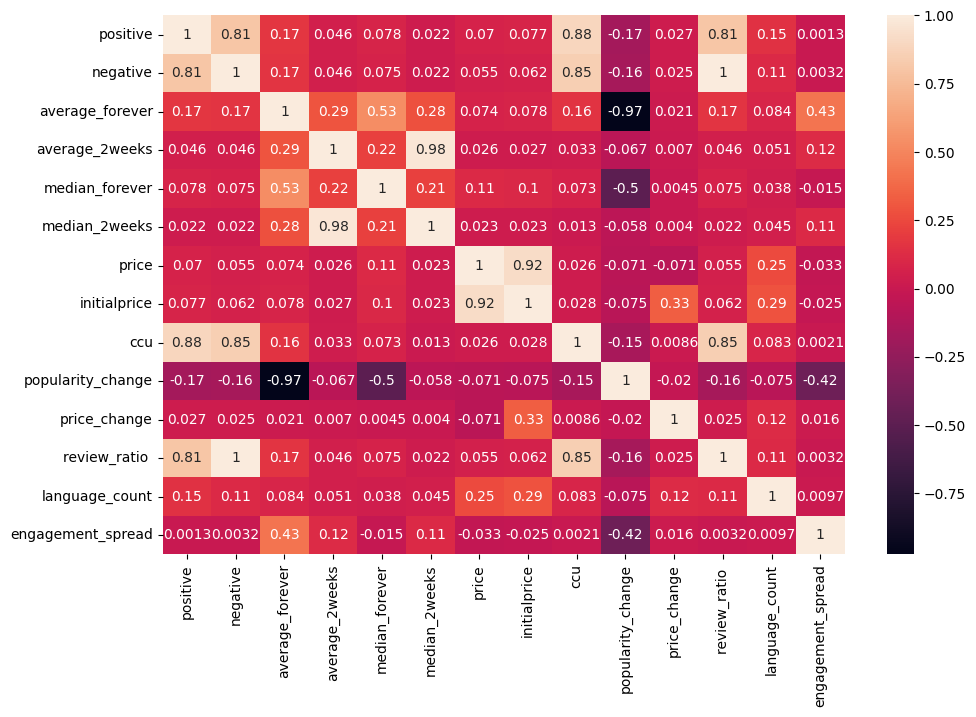

In [42]:
plt.figure(figsize=(11, 7))
sns.heatmap(game_info[numerical].corr(), annot=True)
plt.show()

Great! The only noticable problem is similarity between 'average_2weeks' and 'median_2weeks'. There is no point in keeping the median.

In [44]:
game_info = game_info.drop(columns='median_2weeks')

In [51]:
df = pd.concat([game_info, tags_extracted, languages_encoded, genres_encoded], axis=1)

In [53]:
df.head()

,appid,name,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,...,Audio Production,Software Training,Web Publishing,Nudity,Violent,Free to Play,Movie,Gore,Sexual Content,Accounting
0,730,Counter-Strike: Global Offensive,Valve,Valve,7642084,1173003,"100,000,000 .. 200,000,000",33930,730,6497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1172470,Apex Legends,Respawn,Electronic Arts,668053,326926,"100,000,000 .. 200,000,000",10226,703,939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",1520457,1037487,"100,000,000 .. 200,000,000",23556,892,5987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1623730,Palworld,Pocketpair,Pocketpair,358266,22443,"50,000,000 .. 100,000,000",3715,698,2111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,440,Team Fortress 2,Valve,Valve,1044264,117208,"50,000,000 .. 100,000,000",22688,589,4705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
print(game_info.shape, tags_extracted.shape, languages_encoded.shape, genres_encoded.shape)

(9990, 18) (9990, 2) (9990, 67) (9990, 30)


That's a huge DataFrame, but it's pretty simple. 
* Values from 0 to 19 are core game informations(where 18th and 19th are game tags)
* 20 to 86 are languages
* 87 to 116 are genres

Now we can make a script for all the transformations from above